In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement


# **a**)

In [2]:
States=np.array([0,1])
Prior =  np.array([0.2,0.8])

In [3]:
T= np.array([[0.8,0.2],\
            [0.2,0.8]])

E= np.array([[0.5,0.9],\
            [0.5,0.1]])



In [4]:
DictH = {0:'Justa',1:'Sesgada'}
DictH[0]

'Justa'

In [5]:
DictO = {0:'Cara',1:'Sello'}
DictO[1]

'Sello'

In [6]:
Obs = np.array([1,0,0,0,1,0,1,0])

In [7]:
def GetHiddenStates(States, N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
    
    print(CStates)
    return np.array(Permu)

In [8]:
HiddenStates = GetHiddenStates(States,8)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [9]:
HiddenStates

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [10]:
def GetProb(T,E,Obs,States,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[States[0] ]
    
    for i in range(n-1):
        p *= T[ States[i+1], States[i] ]
    
    
    
    for i in range(n):
        p *= E[ Obs[i], States[i] ]
        
    #print(p, State)
    
    return p

In [11]:
dim = HiddenStates.shape[0]
P1 = np.zeros(dim)


for i in range(dim):
    P1[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
    
#print(P1)

# **b)**

In [12]:
maxP1 = np.max(P1)
ii1 = np.where( P1 == np.amax(P1))
print(HiddenStates[ii1],maxP1)

[[1 1 1 1 0 0 0 0]] 0.0001911029760000001


In [13]:
coin= HiddenStates[ii1]
for i in coin[0]:
  print(DictH[i])


Sesgada
Sesgada
Sesgada
Sesgada
Justa
Justa
Justa
Justa


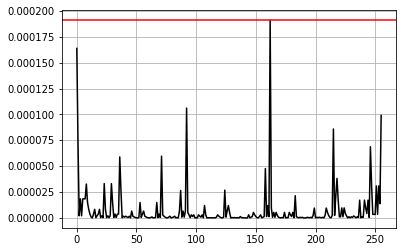

In [14]:
plt.plot(P1,color='k')
plt.axhline(y=maxP1,color='r')
plt.grid()

# **c)**

In [15]:
allObs=HiddenStates.copy()

In [16]:
NObs = allObs.shape[0]
PObs = np.zeros(NObs)

for j in range(NObs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,allObs[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(P)

print(PObs)


[0.13698241 0.04114921 0.0347373  0.03175272 0.03026766 0.02932288
 0.02830811 0.02656789 0.02297818 0.01870516 0.01330002 0.01467809
 0.01079433 0.01067359 0.01276253 0.00956961 0.00877661 0.00936674
 0.01172117 0.00883478 0.00776184 0.00767971 0.00853533 0.01088136
 0.00811519 0.00697382 0.00661175 0.00679511 0.00764233 0.00970066
 0.00694603 0.00590355 0.00547305 0.00537647 0.00555143 0.00611094
 0.0074164  0.00955193 0.00649319 0.00616157 0.00733671 0.00505945
 0.00428819 0.00497251 0.00456283 0.0048075  0.00623446 0.00432462
 0.00337544 0.00382959 0.00321043 0.00330316 0.00416108 0.00372302
 0.00355961 0.00405611 0.00553322 0.00381405 0.00283376 0.00316972
 0.00249084 0.00251514 0.00309313 0.00256378 0.00241017 0.0026765
 0.00353481 0.00309969 0.00278698 0.0028754  0.00342205 0.00478004
 0.00319794 0.00231328 0.00256666 0.00193925 0.00193444 0.00234078
 0.00183427 0.00170131 0.00184945 0.00237437 0.00193054 0.00171671
 0.0017367  0.00200341 0.00268914 0.00229023 0.00199057 0.00192

# **d)**

In [17]:
sumaPo=0
for Obs in allObs:
  dim = HiddenStates.shape[0]
  P = np.zeros(dim)


  for i in range(dim):
      P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
  sumaPo+=np.sum(P, axis=0)
    
#print(P)
#print(np.shape(P))
sumaPo

1.0000000000000002

# **e)** 

In [18]:
prior2= np.array([0.6,0.4])

In [19]:
dim = HiddenStates.shape[0]
P2 = np.zeros(dim)


for i in range(dim):
    P2[i] = GetProb(T,E,Obs,HiddenStates[i],prior2)
    
print(P2)
#print(np.shape(P))

[4.915200e-04 2.457600e-05 6.144000e-06 6.144000e-06 6.144000e-06
 6.144000e-06 6.144000e-06 6.144000e-06 1.638400e-05 4.915200e-06
 3.072000e-07 1.228800e-06 3.072000e-07 7.680000e-08 1.228800e-06
 3.072000e-07 7.680000e-08 7.680000e-08 1.228800e-06 3.072000e-07
 7.680000e-08 7.680000e-08 7.680000e-08 1.228800e-06 3.072000e-07
 7.680000e-08 7.680000e-08 7.680000e-08 7.680000e-08 1.228800e-06
 8.192000e-07 2.048000e-07 2.048000e-07 2.048000e-07 2.048000e-07
 2.048000e-07 3.276800e-06 9.830400e-07 6.144000e-08 6.144000e-08
 2.457600e-07 6.144000e-08 3.840000e-09 1.536000e-08 6.144000e-08
 1.536000e-08 2.457600e-07 6.144000e-08 3.840000e-09 1.536000e-08
 3.840000e-09 9.600000e-10 1.536000e-08 6.144000e-08 1.536000e-08
 1.536000e-08 2.457600e-07 6.144000e-08 3.840000e-09 1.536000e-08
 3.840000e-09 9.600000e-10 1.536000e-08 3.840000e-09 9.600000e-10
 9.600000e-10 1.536000e-08 6.144000e-08 1.536000e-08 1.536000e-08
 1.536000e-08 2.457600e-07 1.638400e-07 1.024000e-08 4.096000e-08
 1.024000e

In [20]:
PObs2 = np.sum(P2)
print(PObs2)

0.0005928642056448001


In [21]:
maxP2 = np.max(P2)
ii2 = np.where( P2 == np.amax(P2))
print(HiddenStates[ii2],maxP2)

[[0 0 0 0 0 0 0 0]] 0.0004915200000000002


In [22]:
coin= HiddenStates[ii2]
for i in coin[0]:
  print(DictH[i])

Justa
Justa
Justa
Justa
Justa
Justa
Justa
Justa


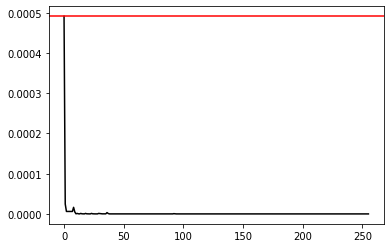

In [23]:
plt.plot(P2,color='k')
plt.axhline(y=maxP2,color='r')

El resultado si depende de la probabilidad a priori pues esta es el punto de partida para calcular el resto de probabilidades y tras probarse otro set de probabilidades a priori se obtiene otro array de probabilidades para las secuencias ocultas.